In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np

In [2]:
df_dqn = pd.read_csv('training_results/metrics_dqn.csv')
df_q = pd.read_csv('training_results/metrics_q.csv')

# Add the 'Episode' column based on the index
df_dqn['Episode'] = df_dqn.index
df_q['Episode'] = df_q.index

# Add a column to distinguish between the DataFrames
df_dqn['Model'] = 'DQN'
df_q['Model'] = 'Q'

# Concatenate the DataFrames
df = pd.concat([df_dqn, df_q])

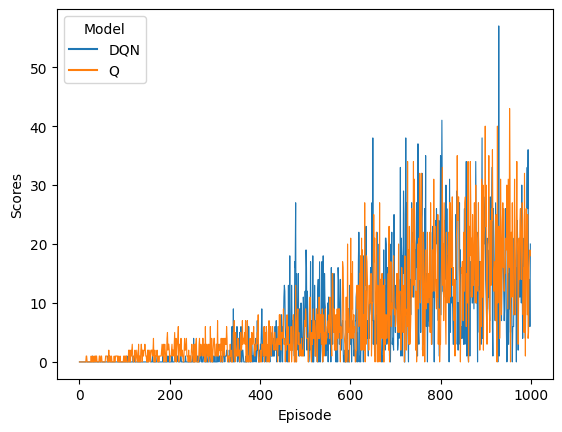

In [12]:
# Plot the line chart using Seaborn
sns.lineplot(data=df, x='Episode', y='Scores', hue='Model', linewidth=0.8)

# Display the plot
plt.show()

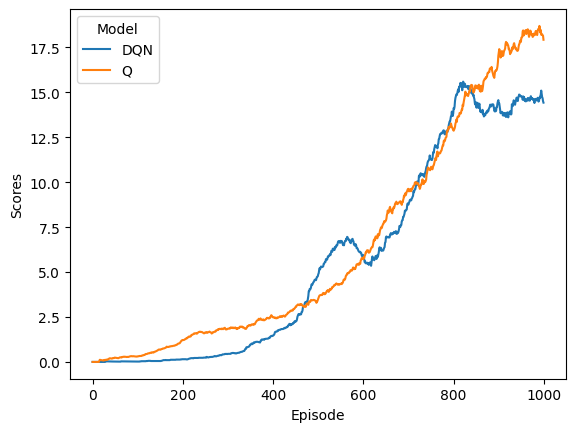

In [13]:
# Calculate the rolling average
rolling_avg = df.groupby('Model')['Scores'].rolling(window=100, min_periods=1).mean().reset_index()
# Rename the 'level_1' column to 'Episode'
rolling_avg = rolling_avg.rename(columns={'level_1': 'Episode'})
# Plot the line chart using Seaborn
sns.lineplot(data=rolling_avg, x='Episode', y='Scores', hue='Model')
# Display the plot
plt.show()


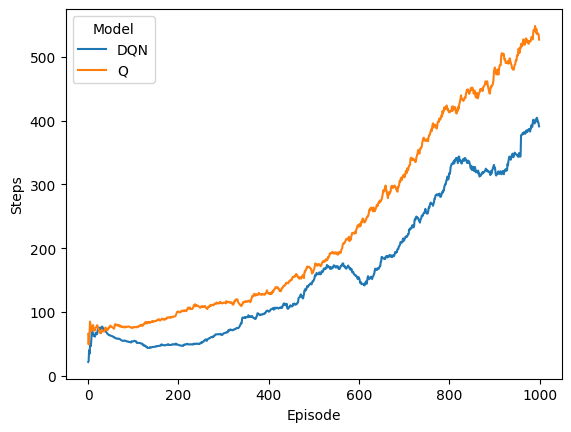

In [14]:
# Calculate the rolling average
rolling_avg = df.groupby('Model')['Steps'].rolling(window=100, min_periods=1).mean().reset_index()
# Rename the 'level_1' column to 'Episode'
rolling_avg = rolling_avg.rename(columns={'level_1': 'Episode'})
# Plot the line chart using Seaborn
sns.lineplot(data=rolling_avg, x='Episode', y='Steps', hue='Model')
# Display the plot
plt.show()

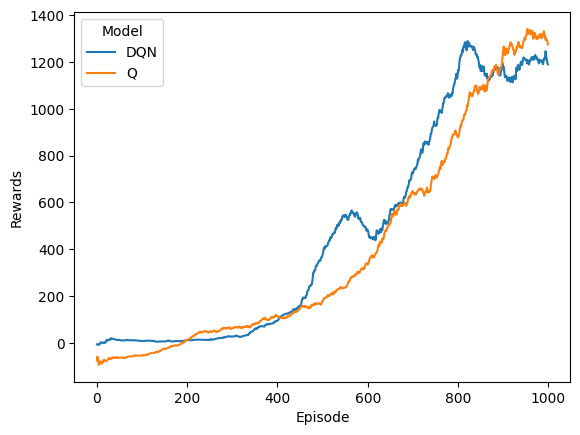

In [15]:
# Calculate the rolling average
rolling_avg = df.groupby('Model')['Rewards'].rolling(window=100, min_periods=1).mean().reset_index()
# Rename the 'level_1' column to 'Episode'
rolling_avg = rolling_avg.rename(columns={'level_1': 'Episode'})
# Plot the line chart using Seaborn
sns.lineplot(data=rolling_avg, x='Episode', y='Rewards', hue='Model')
# Display the plot
plt.show()

In [16]:
# Extract the scores for each model
rewards_q = df_q['Rewards']
rewards_dqn = df_dqn['Rewards']

# Perform independent t-test
t_statistic, p_value = ttest_ind(rewards_q, rewards_dqn)

# Print the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value:.6f}")

T-Statistic: -1.8915771233639356
P-Value: 0.058692


In [17]:
# Extract the scores for each model
scores_q = df_q['Scores']
scores_dqn = df_dqn['Scores']

# Perform independent t-test
t_statistic, p_value = ttest_ind(scores_q, scores_dqn)

# Print the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value:.6f}")

T-Statistic: 2.16883073612055
P-Value: 0.030213


In [18]:
# Extract the scores for each model
steps_q = df_q['Steps']
steps_dqn = df_dqn['Steps']

# Perform independent t-test
t_statistic, p_value = ttest_ind(steps_q, steps_dqn)

# Print the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value:.6f}")



T-Statistic: 7.266188390292804
P-Value: 0.000000
